# Multimodal Fusion Music Recommendation System

The purpose of this notebook is to perform the full data extraction, preprocessing, loading, and model pipeline.

In [1]:
%load_ext autoreload
%autoreload 2

## Data Extraction

In [ ]:
# Install the required packages
%pip install -r requirements.txt

In [95]:
# Download the dataset
!bash download_dataset.sh

Directory 'data' already exists.
Starting download from: http://www.ee.columbia.edu/~thierry/artist_term.db
--2024-11-20 18:22:56--  http://www.ee.columbia.edu/~thierry/artist_term.db
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ee.columbia.edu/~thierry/artist_term.db [following]
--2024-11-20 18:22:56--  https://www.ee.columbia.edu/~thierry/artist_term.db
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138974208 (133M)
Saving to: ‘data/artist_term.db’

data/artist_term.db 100%[===================>] 132.54M  9.12MB/s    in 15s     

2024-11-20 18:23:12 (8.72 MB/s) - ‘data/artist_term.db’ saved [138974208/138974208]

Download completed successfully. Saved as 'data/artist_term.db'.
S

## Preprocessing

In [158]:
from preprocessing.util.processor import Processor

Read data from databases/datasets, do some basic preprocessing, and save them as DataFrames serialized to pickle files.

In [159]:
processor = Processor(debug_messages=True)
processor.process()
processor.save_data()

Reading user listening history file: 48373586it [00:17, 2838733.69it/s]


Read 48373586 user triplets.
Reading mbtags from data/artist_term.db
Reading metadata from data/track_metadata.db
Database connected.
Columns in 'lyrics' table: ['track_id', 'mxm_tid', 'word', 'count', 'is_test', 'song_id']
'song_id' column already exists.
Lyrics table processed and pivoted with song_id as index.
Database connection closed.


## Loading

In [3]:
from models.data_provider import DataProvider

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_provider = DataProvider(
    label_embedding_technique='w2v',
    embedding_config={
        'vector_size': 100,
        'window': 5,
        'min_count': 1,
        'workers': 4,
        'sg': 1
    },
    save_embeddings_to_file=True,
    load_embeddings_from_file=True,
    clustering_method='kmeans',
    debug=True
)

In [5]:
data_provider.load_data()

Reading labels.
Reading tagged metadata.
Reading untagged metadata.
Reading lyrics.
Reading user data.


In [ ]:
data_provider.generate_training_classes(cluster_config={'n_clusters': 10})

Generating training classes.
Reading label embedding dictionary from data/embeddings/label_embeddings/embedding_w2v.pkl.
Aggregating embeddings for all tracks.
Clustering mbtag_embedding.


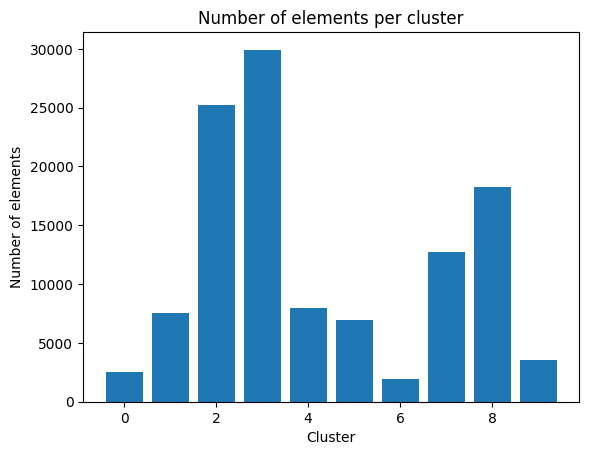

In [7]:
data_provider.plot_cluster_distribution()

In [8]:
data_provider.untagged_metadata_df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


In [572]:
data_provider.tagged_metadata_df.shape

(116479, 15)

In [574]:
data_provider.labels_df.head()

,track_id,mbtag,mbtag_embedding,cluster
16,TRMMMUT128F42646E8,[folk],"[0.64793533, -0.30135858, 0.38372925, 1.133543...",9
17,TRMMMQY128F92F0EA3,[brutal death metal],"[-0.35471538, 0.5604433, -0.16686048, -0.35166...",7
18,TRMMMTK128F424EF7C,[post-hardcore],"[-0.012657667, 0.016906891, -0.16616006, 0.322...",2
23,TRMMMNO128F93539AA,"[american, folk]","[0.13815306, -0.0054058284, 0.24627738, 0.9523...",1
25,TRMMMPJ128F9306985,[yolandita monge],"[-0.0041433666, -0.008938043, 0.00040051102, 0...",8


In [576]:
s = set()
for i, row in data_provider.labels_df.iterrows():
    for label in row['mbtag']:
        s.add(label)
len(s)

1859

In [578]:
s = set()
for i, row in data_provider.labels_df.iterrows():
    s.add(" ".join(sorted(row['mbtag'])))
len(s)

3063

## Model

### Metadata Model

Generate an embedding vector for each song's metadata. This is done by creating an embedding for the song title, album title, and artist name, and concatenating them. Additional features such as release year, duration, an 'artist familiarity' rating, and 'artist hottness' rating are appended.

In [9]:
from models.metadata_model import MetadataModel

In [10]:
generic_w2v_encoder_config = {
    'embedding_technique': 'w2v',
    'aggregation_technique': 'mean',
    'load_from_file': True,
    'save_to_file': True,
    'vector_size': 100,
    'window': 5,
    'min_count': 1,
    'workers': 4,
    'sg': 1
}
metadata_model = MetadataModel(
    metadata_df=data_provider.tagged_metadata_df,
    configs={
        'title_encoder': generic_w2v_encoder_config,
        'release_encoder': generic_w2v_encoder_config,
        'artist_name_encoder': generic_w2v_encoder_config
    },
    debug=True
)

In [647]:
metadata_embeddings_df = metadata_model.get_metadata_embeddings()

Reading label embedding dictionary from data/embeddings/title_embeddings/embedding_w2v.pkl.
Reading label embedding dictionary from data/embeddings/release_embeddings/embedding_w2v.pkl.
Reading label embedding dictionary from data/embeddings/artist_name_embeddings/embedding_w2v.pkl.


### Lyrics Model (WIP)

In [637]:
from models.lyrics_model import LyricsModel
import numpy as np

In [639]:
lyrics_model = LyricsModel(
    common_track_ids=data_provider.lyrics_df['song_id'].tolist(),
    embedding_technique='roberta',
)
lyrics_embeddings_df = lyrics_model.get_lyrics_embeddings()

### Audio Model (WIP)

### Fusion Step

Now that we have all embeddings for each modality (metadata, lyrics, audio), we can perform fusion on them.

In [559]:
import numpy as np
from models.fusion import FusionStep

In [648]:
# Create matrices out of the embedding dataframes.
metadata_embedding = np.array(metadata_embeddings_df['metadata_embedding'].tolist())
lyrics_embedding = np.array(lyrics_embeddings_df['embedding'].tolist())

In [649]:
lyrics_embedding.shape

(116479, 768)

In [650]:
fusion_step = FusionStep(
    fusion_method='concat',
    debug=True
)
fusion_step.load_component(metadata_embedding)
fusion_step.load_component(lyrics_embedding)
fusion_step.fuse()
fused_embedding = fusion_step.fused_vectors

## Training

We have our fused embeddings which are the input to the fusion DNN model. We can now train it.

In [564]:
from models.train import FusionModelTrainer

In [565]:
train_test_split_mask = data_provider.train_test_split_mask

In [566]:
train_data = fused_embedding[train_test_split_mask]
train_labels = np.array(data_provider.labels_df['cluster'][train_test_split_mask])

test_data = fused_embedding[~train_test_split_mask]
test_labels = np.array(data_provider.labels_df['cluster'][~train_test_split_mask])

In [567]:
train_config = {
    'learning_rate': 0.0005,
    'num_epochs': 1000,
    'dropout_rate': 0.3,
}
trainer = FusionModelTrainer(
    train_data=train_data,
    train_labels=train_labels,
    test_data=test_data,
    test_labels=test_labels,
    hidden_sizes=[128, 256, 512],
    num_classes=10,  # make sure this is equal to the number of training classes generated
    config=train_config,
    debug=False
)

In [568]:
# Rerun this cell to train the model again.
trainer.train()

Training Fusion Model: 100%|██████████| 1000/1000 [08:15<00:00,  2.02it/s]


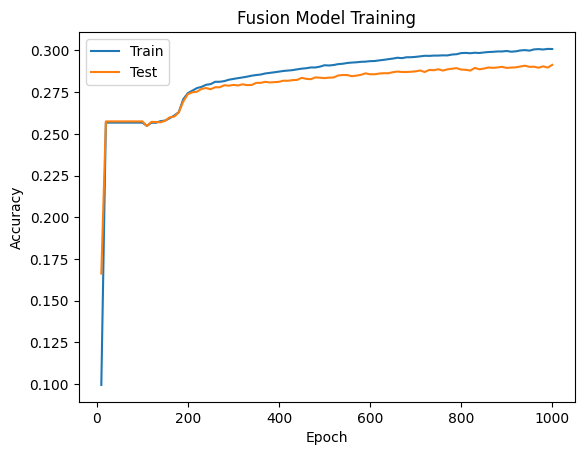

In [571]:
trainer.plot_accuracies()

In [570]:
trainer.latest_accuracies()

(0.3008369414570732, 0.29129988889838476)

# Recommender

In [415]:
import pandas as pd
from models.recommender import Recommender, RecommenderEvaluator

In [369]:
test_predicted = trainer.get_test_inferences().tolist()
test_track_ids = data_provider.tagged_metadata_df['song_id'][~train_test_split_mask].tolist()
test_predictions_df = pd.DataFrame(data=[test_track_ids, test_predicted], index=['song_id', 'prediction']).T

In [495]:
# downsample the user_data_df to consider less users for reasonable evaluation time (using 1% of the user listening history data)
user_data_df = data_provider.user_data_df.sample(frac=0.001)
user_data_df.shape

(48374, 3)

In [496]:
recommender = Recommender(
    user_data_df=user_data_df,
    predictions_df=test_predictions_df,
    debug=False
)

In [497]:
print(f"Proportion of test songs in user_data_df: {recommender.user_data_df.shape[0] / data_provider.user_data_df.shape[0] * 100:.2f}%")
print(f"Number of records of user_data_df used by recommender (only songs in test set): {recommender.user_data_df.shape[0]}")

Proportion of test songs in user_data_df: 0.01%
Number of records of user_data_df used by recommender (only songs in test set): 3649


In [498]:
# chose a random user to recommend
user_id = recommender.user_data_df['user_id'].sample().iloc[0]
recommendations = recommender.recommend(user_id, n=10, omit_listened_to=True)
recommendations

/Users/danieloman1/Desktop/multimodal-music-recommender/models/recommender.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['similarity'] = predictions['prediction'].apply(lambda x: np.dot(np.array(x), fingerprint))


,song_id,prediction,similarity
0,SOKOVRQ12A8C142811,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
15031,SORWPCP12A8C13B9D8,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
15044,SOQXLUW12A8AE48572,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
15043,SOTVVQF12A8C1417B8,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
15042,SOWHFYD12A58A7E4FA,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
15037,SOADZXA12AB0180129,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
15036,SOUFUAB12A8C14583E,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
15035,SOHJHYL12A58A786CA,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
15034,SOZZQRF12A8C134FBB,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
15033,SOXVKUJ12AB0185D68,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0


In [499]:
recommender_evaluator = RecommenderEvaluator(recommender)

In [502]:
recommender_evaluator.evaluate()

Computing mAP with top 500 recommendations per user: 100%|██████████| 3632/3632 [01:20<00:00, 44.88it/s]


0.011754948139050531

## End-To-End Recommendation

Use this section to tune hyperparemeters for e2e execution.

In [1]:
%load_ext autoreload
%autoreload 2
from e2e_recommender import E2ERecommender

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# Config for e2e recommendation model
config = {
    'data_provider': {
        'label_embedding_technique': 'w2v',
        'embedding_config': {
            'vector_size': 100,
            'window': 5,
            'min_count': 1,
            'workers': 4,
            'sg': 1
        },
        'save_embeddings_to_file': True,
        'load_embeddings_from_file': True,  # should be false if generating new embeddings using new parameters
        'clustering_method': 'kmeans',
        'cluster_config': {
            'n_clusters': 4
        }
    },
    'metadata_model': {
        'title_encoder_config': {
            'embedding_technique': 'w2v',
            'aggregation_technique': 'mean',
            'load_from_file': True,
            'save_to_file': True,
            'vector_size': 50,
            'window': 5,
            'min_count': 1,
            'workers': 4,
            'sg': 1
        },
        'release_encoder_config': {
            'embedding_technique': 'w2v',
            'aggregation_technique': 'mean',
            'load_from_file': True,  # should be false if generating new embeddings using new parameters
            'save_to_file': True,
            'vector_size': 50,
            'window': 5,
            'min_count': 1,
            'workers': 4,
            'sg': 1
        },
        'artist_name_encoder_config': {
            'embedding_technique': 'w2v',
            'aggregation_technique': 'mean',
            'load_from_file': True,  # should be false if generating new embeddings using new parameters
            'save_to_file': True,
            'vector_size': 50,
            'window': 5,
            'min_count': 1,
            'workers': 4,
            'sg': 1
        },
    },
    'fusion': {
        'fusion_method': 'concat',
    },
    'train': {
        'hidden_sizes': [256, 128, 128, 256, 512],
        'learning_rate': 0.001,
        'num_epochs': 2000,
        'dropout_prob': 0.5,
    },
    'recommender': {
        'sample_frac': 0.001,
        'n_recommendations': 500,
    }
}
e2e_recommender = E2ERecommender(config, debug=False)

Training Classes Step
Multimodal Features Step
Fusion Step
Train Fusion Model Step


Training Fusion Model: 100%|██████████| 2000/2000 [36:31<00:00,  1.10s/it]


Recommender System Step


Computing mAP with top 500 recommendations per user: 100%|██████████| 3652/3652 [01:14<00:00, 49.34it/s]


Saving output to e2e_output/execution_0f09528b968fa5d51830b8ad87c19725


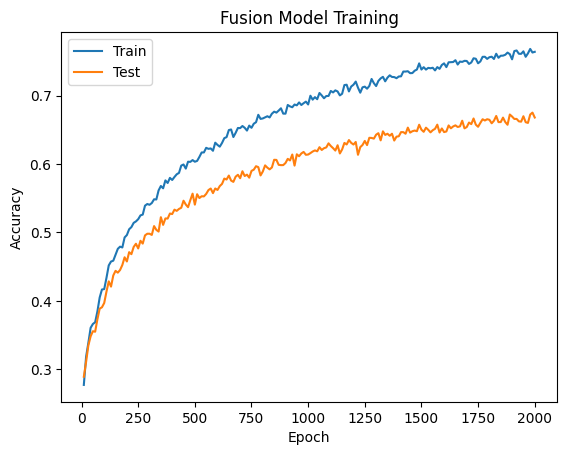

In [17]:
e2e_recommender.execute()

execution_bba67f891c66bc3dff1b490cecf5dc08 -- good, but overfits

execution_9054f142191814ad8183290a960bae6b -- lower overfitting, but very high mAP: 0.04152